# On Phase Kickback, Bernstein-Vazirani algorithm, Quantum Fourier Transform and Phase Estimation

<div style="color:#202020;font-size:11px;font-style:italic;text-align:right; width: 100%">This cell contains some LaTeX macros (source: QWorld).</div>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

### Disclaimer:
1. This notebook contains my personal note, deduction, and conclusions, bear in mind that it might contain: mistakes, typos, etc. If you find any, feel free to reach me and I can fix it.
1. To run this notebook, you need `qiskit[visualization]`, `imageio`, `numpy` and, `scipy` packages.

### Content:
1. [The problem hand](#The-problem-at-hand)
1. [Phase Kickback: From Global to local phase](#Phase-Kickback:-From-Global-to-local-phase)
1. [Digression: the Bernstein-Vazirani algorithm](#Digression:-the-Bernstein-Vazirani-algorithm)
1. [The Fourier Basis](#The-Fourier-Basis)
1. [Gathering the parts: The Quantum Phase Estimation](#Gathering-the-parts:-The-Quantum-Phase-Estimation)

In [1]:
%run ./lib/barrel.py

## The problem at hand

Let's suppose that you have an operator $U$ that has an eigenvector $\ket{\psi}$ with eigenvalue $e^{i\theta}$. **Our task is to find the numerical value of $\theta$.**

For simplicity, let's assume that the $U$ is just the $P$-Gate. In which case, the eigenvector would be $\ket{1}$.

So, how shall we proceed? 

We could, for example:
1. Make circuit with a qubit in $\ket{1}$ state.
1. Apply the $U$ gate on it which would transform our qubit $\ket{1}$ to $e^{i\theta}\ket{1}$.

But, we would have no way to extract the $\theta$ as the both the state are equivalent up to a global phase. If we make a measurement, we would get $1$, no matter the value of $\theta$ 😟.

## Phase Kickback: From Global to local phase

We saw that applying the $U$-gate directly, just introduces a global phase and we know that two states are equivalent if they only differ by a global phase. Let's try to introduce the phase $e^{i\theta}$ as local, can we?

Let's take a look at the following circuit:

<img src="./images/qpe_g2l.png" />


1. We create a 2 qubit circuit.
$$\text{state} = \ket{0} \otimes  \ket{0}$$
1. We initialize the first qubit in the state $\ket{+}$ and the second in the state $\ket{\psi}$ (the eigenvector of $U)$.
$$\text{state} = \ket{\psi} \otimes \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) $$
1. We apply the Controlled-U gate  $CU$ where the first qubit is the control qubit and the second qubit is the target qubit.
$$\text{state} = \frac{1}{\sqrt{2}} (\ket{\psi} \otimes \ket{0} + U\ket{\psi} \otimes \ket{1}) \\ 
\text{state} = \frac{1}{\sqrt{2}} (\ket{\psi} \otimes \ket{0} + e^{i\theta}\ket{\psi} \otimes \ket{1}) \\
\text{state}= \ket{\psi} \otimes \frac{1}{\sqrt{2}} ( \ket{0} + e^{i\theta} \ket{1})$$

Incredible, we just transfered the global phase created by the $U$-gate to the local phase of another qubit 😲. It is as if we rotate the first qubit by angle $\theta$ around the $Z$-axis.

The Initial State:


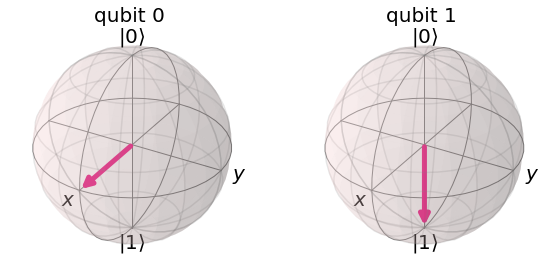

The Final State:


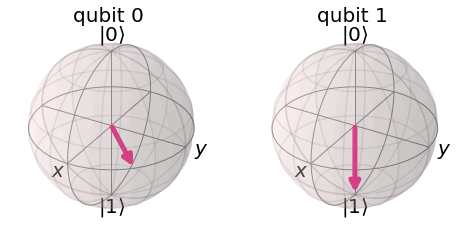

In [2]:
draw_phasekick()

Sadly, there is no measurement that would allow us to retrieve the value of $\theta$. We need to find another way.

## Digression: the Bernstein-Vazirani algorithm

Let's digress a little bit and try to solve another problem. 

Let's assume we have a function which takes two bitstrings _(a bitstring is just a list of 0s and 1s)_ $s$ and $x$, it calculates the dot product of the two bitstrings and returns the $0$ if the dot product is even and $1$ otherwise. 

$$f(x, s) = (x \cdot s) \; \% \; 2 = 0\text{ or }1$$

An example of such a function is present here:

| $x$   | $s$   | $x \cdot s$         | $f(x, s)$ |
|-------|-------|---------------------|-----------|
| $00$  | $01$  | $0 * 0 + 0 * 1 = 0$ | $0$       |
| $01$  | $01$  | $0 * 0 + 1 * 1 = 1$ | $1$       |
| $11$  | $11$  | $1*1 + 1*1 = 2$     | $2\%2=0$  |
| $111$ | $111$ | $1*1 + 1*1+1*1 = 3$ | $3\%2=1$  |


Let's also that assume that someone fixed the value of the bitstring $s$, such that we can only change the value of the bitstring $x$. **Our goal is to find what is the value of $s$**.

If you try to solve this classicaly, you will find that to the value of the bit at position $i$, you need to calculate the function $f$ with all the bits of $x$ being $0$ except the bit at position $i$. This means that we need to calculate $f(x, s)$ $n$-times where $n$ is the length of the bitstring.

Quantum mechanically, we can solve the problem calculting $f(x, s)$ (or more precisely, by executing the Oracle $U_f$) only $1$-time using the phase-kickback trick that you (probably) already know about:

If we are looking for an $s$-bitstring of length $n$: 
1. We create a quantum circuit of $n+1$ qubits. I will call the first $n$ qubits _"main register"_ and the last qubit the _"ancilla qubit"_.
1. We prepare the main register in the $\ket{+}$ state and the ancilla qubit in the $\ket{-}$.
1. We execute the oracle $U_f$ which takes the state $\ket{y,x}$ and returns the state $\ket{y \oplus f(x), x}$ w _($y$ is the ancilla and $x$ is the main register)_.
1. We apply the Hadamard gate on the main register.
1. Finally, we make a measurement on the main register. The result that we obtain is the bitstring $s$.

Okay, let's try to go through this step by step and understand, what are we doing and most importantly why are we doing it.

### First Step: The choice of the number of qubits

A bitstring $s$ of length $n$, can have $2^n$ different values. So, the minimum number of qubits we need in our circuit should be able to encode $2^n$. As we know, a qubit can encode $2$ states and $n$-qubits can encode $2^n$. So in this case, we would need at least $n$-qubits to retrieve a bitstring of length $n$.

### Third Step: The action of the Oracle $U_f$

The oracle action is well-known, given a state $\ket{y, x}$ the oracle $U_f$ returns the state $\ket{y \oplus f(x, s), x}$. In our case, the oracle takes the state $\ket{-, +...+}$, thus it returns the state:

$$\ket{- \oplus f(x, s), +...+} = \frac{1}{\sqrt{2}} \left( \; \ket{f(x, s)} - \ket{(1 + f(x, s))\;  \% \; 2}\; \right) \otimes \ket{+...+}$$

_(For conviniene, I will write the main register $\ket{+...+}$ as an explicit tensor product of $n$ qubits: $\bigotimes_{i=0}^{n-1} \ket{+}$.)_


**In the case f(x, s) = 0**:

$$\ket{- \oplus f(x, s), +...+} = \frac{1}{\sqrt{2}} \left( \; \ket{0} - \ket{1}\; \right)  \otimes \bigotimes_{i=0}^{n-1} \ket{+} = \ket{-}  \bigotimes_{i=0}^{n-1} \ket{+} $$

**In the case f(x, s) = 1**:

$$\ket{- \oplus f(x, s), +...+} = \frac{1}{\sqrt{2}} - \left( \; \ket{1} - \ket{0}\; \right)  \otimes \bigotimes_{i=0}^{n-1} \ket{+} = (-1) \ket{-}  \bigotimes_{i=0}^{n-1} \ket{+} $$

**We can write both cases as**:
$$\ket{- \oplus f(x, s), +...+} =(-1)^{f(x, s)} \ket{-}  \otimes \bigotimes_{i=0}^{n-1} \ket{+} $$


Notice that, we could also write the above result as:

$$\ket{- \oplus f(x, s), +...+} = \ket{-} \otimes (-1)^{f(x, s)} \bigotimes_{i=0}^{n-1}  \ket{+} $$

And we know that $f(x, s) = x_0 \cdot s_0 + ... + x_i \cdot s_i +... + x_{n-1} \cdot s_{n-1} $, which means that we can also write the above result as:

$$\ket{- \oplus f(x, s), +...+} = \ket{-} \otimes \bigotimes_{i=0}^{n-1}  (-1)^{x_i \cdot s_i}\ket{+} = \ket{-} \otimes \bigotimes_{i=0}^{n-1}  \frac{1}{\sqrt{2}} \left((-1)^{0 \cdot s_i}\ket{0} + (-1)^{1 \cdot s_i}\ket{1}\right) $$

$$\ket{- \oplus f(x, s), +...+} = \ket{-} \otimes \bigotimes_{i=0}^{n-1}  \frac{1}{\sqrt{2}} \left(\ket{0} + (-1)^{s_i}\ket{1}\right)$$

$$\ket{- \oplus f(x, s), +...+} = \ket{-} \otimes \bigotimes_{i=0}^{n-1} Z^{s_i} \ket{+}$$

We can see the effect of our oracle $U_f$ is equivalent to applying the $Z$-Gate to the $i$-th whenever the $s_i = 1$. And thus, it is mapping different bitstrings $s$ to different states, for example for $n = 2$:

| Bitstring $s$ | Initialized main register | Main register after applying $U_f$ |
|---------------|---------------------------|------------------------------------|
| $00$          | $\ket{++}$                | $\ket{++}$                         |
| $01$          | $\ket{++}$                | $\ket{+-}$                         |
| $10$          | $\ket{++}$                | $\ket{-+}$                         |
| $11$          | $\ket{++}$                | $\ket{--}$                         |

**Task:** Try to convince yourself that this is also true for more qubits.

We can also see that the resulting states are orthogonal, and that they form an **orthogonal basis**:

$$\braket{++}{+-} = 0$$

**Task**: Calculate the inner product between other states to convince yourself that this is true.

### The Second step: the state initialization

#### Main Register

Now, let's move on the initialization step. We saw that the action of the oracle can be described as $Z$-Gates being applied to specific qubits. **Why do need to initialize our first register in the $\ket{+...+}$ state then?**

To answer this question, let's recall what the $Z$-gate does:

Before the Z-Gate is applied:


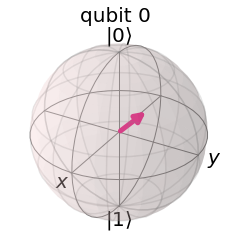

After the Z-Gate is applied:


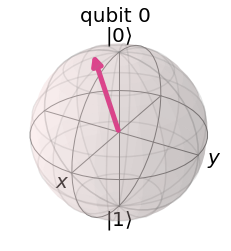

In [3]:
draw_before_after_z("a")

Before the Z-Gate is applied:


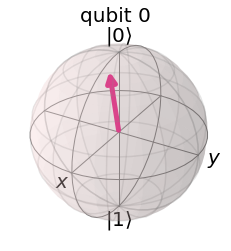

After the Z-Gate is applied:


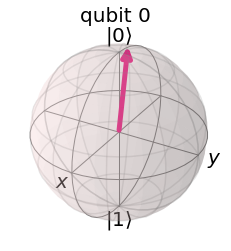

In [4]:
draw_before_after_z("a")

Before the Z-Gate is applied:


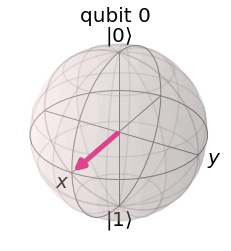

After the Z-Gate is applied:


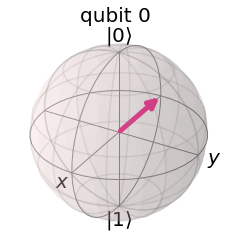

In [5]:
draw_before_after_z("+")

The Z-gate does a $\pi$ rotation around the $Z$-axis. So, in order for the oracle to change the main register then main register need to be in a state diffrent from $\ket{0}$ or $\ket{1}$ as a $Z$-gate on these states doesn't change then (up to a global phase).

Before the Z-Gate is applied:


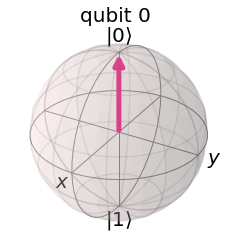

After the Z-Gate is applied:


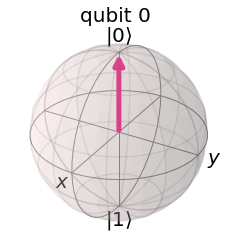

In [6]:
draw_before_after_z("0")

Before the Z-Gate is applied:


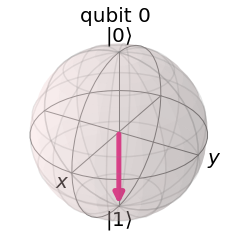

After the Z-Gate is applied:


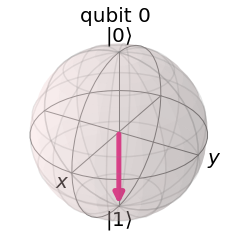

In [7]:
draw_before_after_z("1")

So, we applied a series of $H$-gates to have states that are can be affected by a $Z$-gate.

Before the Z-Gate is applied:


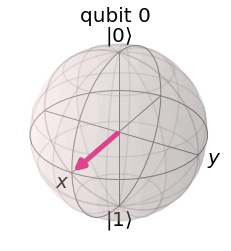

After the Z-Gate is applied:


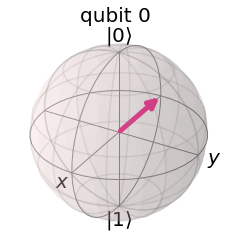

In [8]:
draw_before_after_z("+")

#### Ancilla Qubit:
We can also see that if the ancilla qubit was,for example, in the $\ket{+}$. The oracle would not be able to  map different bitstrings to different basis vectors.

### The Fourth step: the readout

After the oracle, we obtain orthogonal states, such that each states maps to a specific bitstring $s$. But, if we do the measurement right away. The results that we would obtain are indistinguishable. Example for $n=2$:

In [9]:
measurement_results_for("++")

{'11': 250, '01': 245, '10': 237, '00': 268}

In [10]:
measurement_results_for("+-")

{'11': 236, '01': 246, '00': 242, '10': 276}

In [11]:
measurement_results_for("-+")

{'01': 234, '11': 257, '00': 276, '10': 233}

In [12]:
measurement_results_for("--")

{'11': 233, '01': 255, '00': 250, '10': 262}

So, we need to return from the basis in which the results of the $U_f$ gates are encoded to the computational basis of $\ket{0}$ and $\ket{1}$ while keeping the results distinguishable. In this case, the results are in the hadamard basis and to go from the hadamard basis to the computational basis. We need to apply the $H$-gate.

### Recap and Generalization

Let's recap and generalize the steps that we implemented to solve the Bernstein-Vazirani problem:
1. We need enough qubits to encode our desired result
1. We need to initialize the state such that our Oracle can effectively encode the desired information. We can say that we need to go from the computational basis to a specfic basis which is more suitable for our Oracle to resolve the problem (for the BV problem the basis is the Hadamard basis).
1. We need an Oracle which encodes the a specific information into specific basis vectors.
1. We need to go back from that specific basis to our computational basis to readout the seeked-for information.


Now, can we use the steps above to solve our initial and main problem (which is to find $\theta$, in case you forgot 😅)? 

**Task**: Try to take a moment and ponder if we can or cannot, and why?

**Answer:** 
1. How much qubits do we need? Well, we need to find an angle which is a real number between 0 and $2\pi$, which means there is an infinite number of desired results and thus, we would need an infinite number of qubits 😱. It looks like our problem is unsolvable in an exact manner for an arbitrary $\theta$ 😭. Let's proceed, nonetheless, and instead **let's look for an estimate value for $\theta$**.
2. We also need to look for an oracle (and a basis) that can encode the estimate value of $\theta$...

## The Fourier Basis

Let's digress another time and talk about the **Fourier Basis**. The Fourier basis is the quantum fourier transform of the computational basis. The quantum fourier transform (QFT for short) is the quantum implementation of the discrete fourier transform which is:

> In mathematics, the discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. <cite>Wikipedia</cite>

I don't know about you but that is not very clear to me! Let's look at the mathematical expression:

The Quantum Fourier Transform $QFT$ of state $\ket{\psi}$ is given by
$$
\ket{\phi} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \sum_{j=0}^{N-1}e^{\frac{2\pi i j k }{N}}x_j \ket{k},
$$
Still, not very clear 😰😰😰... But, okay. Let's ignore the definition, let's ignore the mathematical expression and just draw the fourier basis and try to understand it.

### Obeservation

In [13]:
animate_fbasis(nb_qbits=1)

HTML(value='<img src="./images/tmp/final_1659989694.9426308.gif" width="200"/>')

In [15]:
animate_fbasis(nb_qbits=2)

HTML(value='<img src="./images/tmp/final_1659989701.8188648.gif" width="400"/>')

In [16]:
animate_fbasis(nb_qbits=3)

HTML(value='<img src="./images/tmp/final_1659989703.1665065.gif" width="600"/>')

**Task:** Take a minute and write down what you observe about the Fourier Basis?

**Observations**:
1. We see that all our qubits are in the $x-y$ plan.
1. We see that our qubit make rotations around the Z-axis by an angle $\pi$.
1. We see that our right qubit does the same thing as the qubit in the case $n =1$. And that our left qubit make rotations around the Z-axis by an angle $\pi/2$.
1. We see that our two right qubits do the same thing as the qubits in the case $n =2$. And that our left qubit make rotations around the Z-axis by an angle $\pi/4$.


Does this hold true for an arbitrary number of qubits $n$? YES!

> To get the fourier transform of the k-th computational state vector (assuming we have $n$ qubits). We rotate the least significant qubit $k$-time by $2\pi/2^n$, the next qubit by $2k * 2\pi/2^n$, the next by $4k * \pi/2^n$, ... and the most significant qubit $k\pi$.

**Task**: As an exercice, try to draw/plot all the qubits for all the fourier basis vectors for $n= 4$

**Answer**:

<IPython.core.display.Latex object>

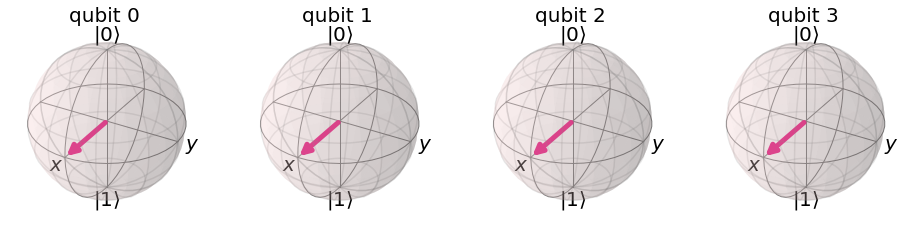

<IPython.core.display.Latex object>

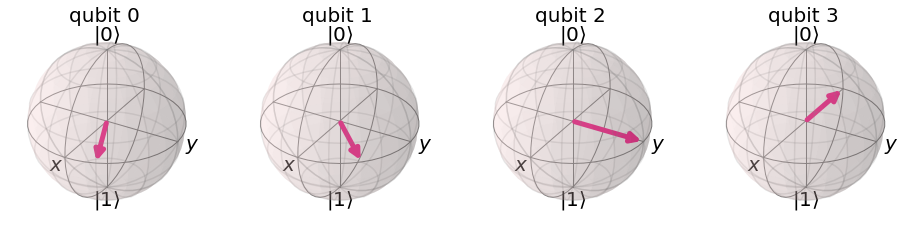

<IPython.core.display.Latex object>

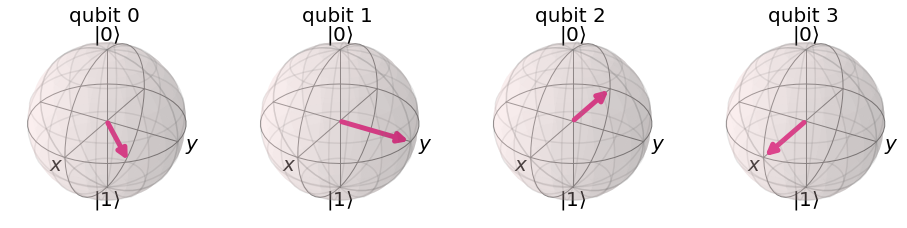

<IPython.core.display.Latex object>

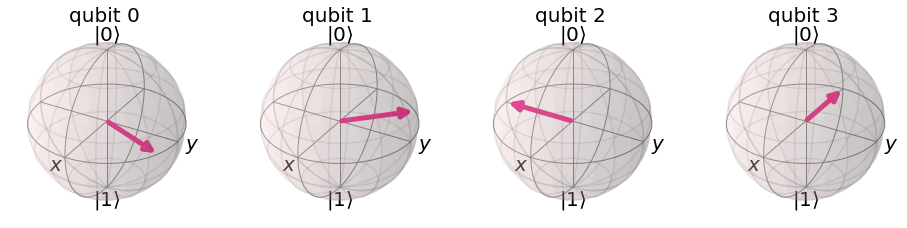

<IPython.core.display.Latex object>

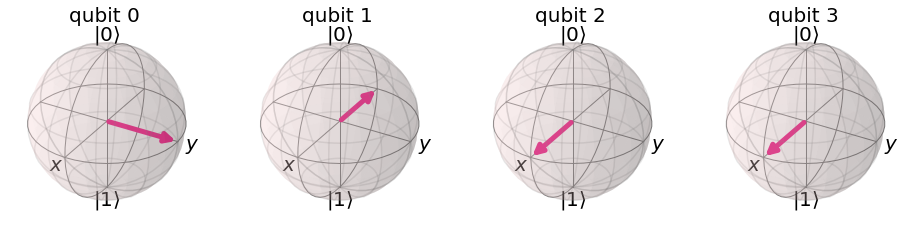

<IPython.core.display.Latex object>

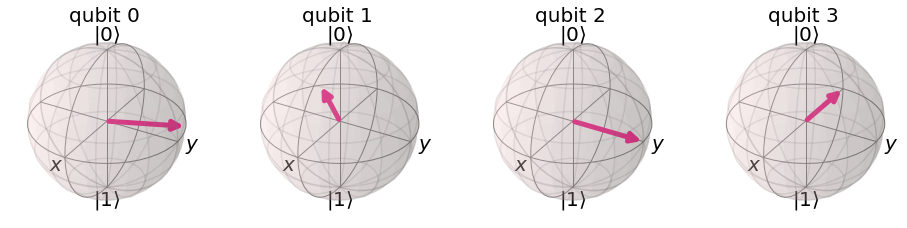

<IPython.core.display.Latex object>

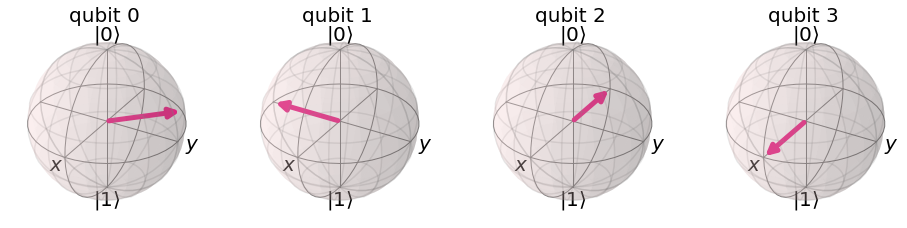

<IPython.core.display.Latex object>

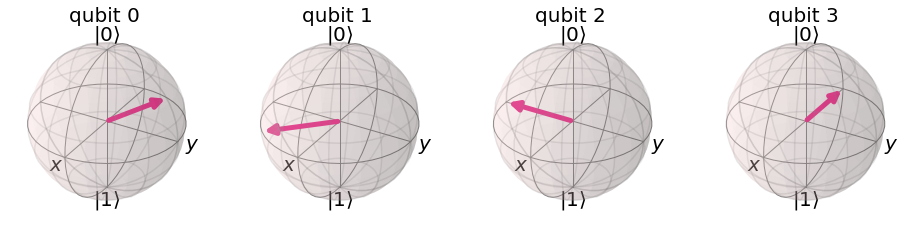

<IPython.core.display.Latex object>

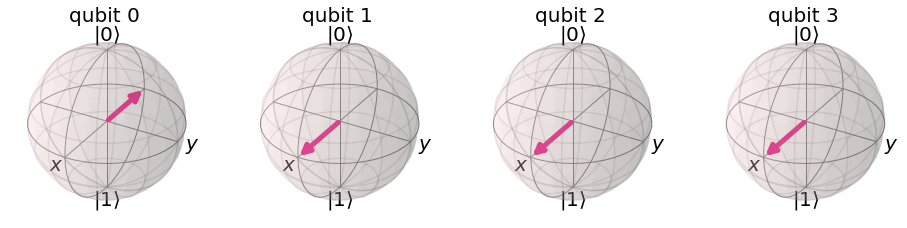

<IPython.core.display.Latex object>

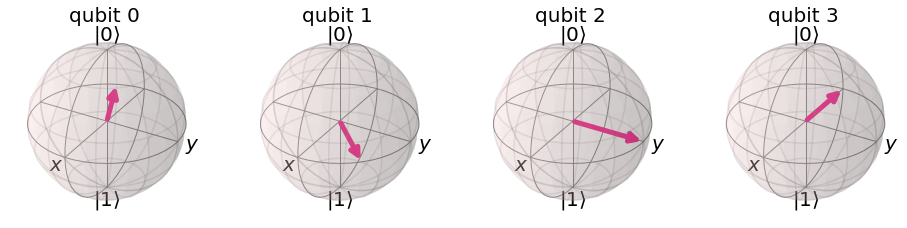

<IPython.core.display.Latex object>

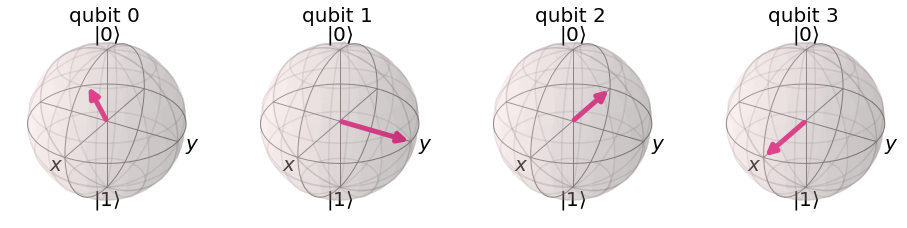

<IPython.core.display.Latex object>

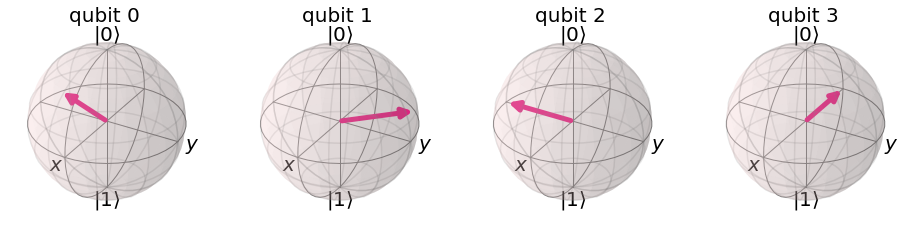

<IPython.core.display.Latex object>

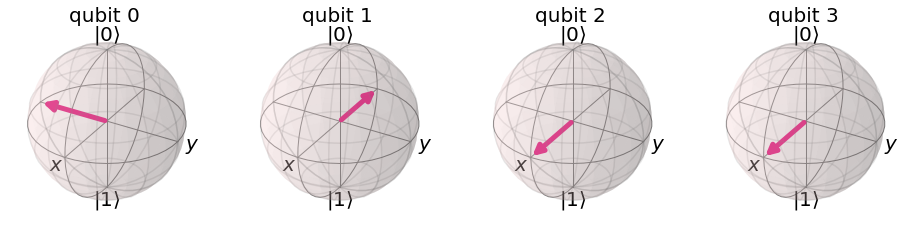

<IPython.core.display.Latex object>

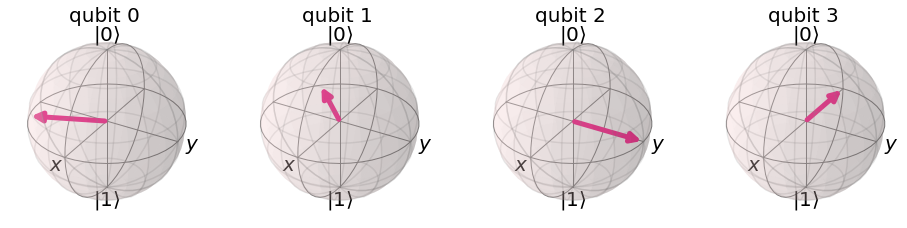

<IPython.core.display.Latex object>

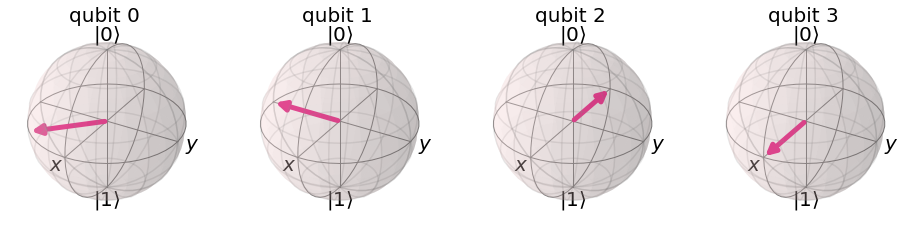

<IPython.core.display.Latex object>

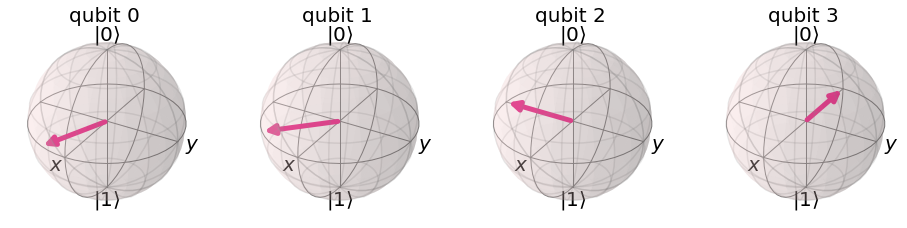

In [17]:
draw_fbasis(nb_qbits=4)

## Gathering the parts: The Quantum Phase Estimation

We can see that the fourier basis (of $n$ qubits) is a series of rotation on the $x-y$ plan by an angle $2\pi k/2^n$. Let's think how use this basis to solve our phase estimation problem.

1. We can create a circuit with $t+1$ qubits, where I will call the first $t$ qubits the control qubits and the last qubit the target qubit (you will see why I choose these names in a moment).
1. Then, we initialize the our control qubits in the $x-y$ plan with a local phase of $0$. This would be equivalent to applying the $H$-gate to all of control qubits. And we initialize the target qubit in the eigenvector state $\ket{\psi}$.
1. Then, by using the proceduce of phase kickback described in (this part)[http://localhost:8888/notebooks/content/phase_estimation_qft.ipynb#Phase-Kickback:-From-Global-to-local-phase], we would be able to rotate our control qubits (now, you understand the naming control qubits/target qubit).
1. Then, we would perform a inverse fourier transform to go back to the computational basis.
1. Finally, we do a measurement. The angle $\theta$ should  be the decimal value of the result that we get multiplied by $2\pi/2^t$

### Applications:
Let's try to go step by step into the procedure described above.

#### Example 01:

Let's assume that our operator $U$ is just the phase operator and we know that the eigenvector is $\ket{1}$. Let's also assume that we only have 3 qubits (available in total).

In [19]:
from qiskit.circuit.library import QFT
import numpy as np

In [20]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister

In [21]:
nb_qubits = 3
theta = np.pi / 2

def explain_qpe(nb_qubits, theta):
    svs = []
    
    control = QuantumRegister(nb_qubits - 1, name="c")
    target = QuantumRegister(1, name="ev")
    result = ClassicalRegister(nb_qubits - 1, name="r")
    qc = QuantumCircuit(control, target, result)
    qc.x(target)
    qc.barrier()

    for i in range(control.size):
        qc.h(control[i])
            
    svs.append(get_statevector(qc))
    qc.barrier()

    
    for i in range(control.size):
        qc.cp(2**i * theta, control[i], target)
        svs.append(get_statevector(qc))
    qc.barrier()


    iqft = QFT(num_qubits=control.size, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='QFT')
    qc.compose(iqft, qubits=[i for i in range(control.size)], inplace=True)
    svs.append(get_statevector(qc))
    qc.barrier()

    
    qc.measure(range(control.size), range(result.size))

    display(qc.draw(output="mpl"))
    

    res = get_results(qc)
    dec_res = int(res.most_frequent(), 2)
    base_angle = 1 / 2 **(control.size - 1)
    
    print("The measurement results are:")
    print(res)
    print()
    
    if len(res.keys()) == 1:
        print(f"Theta was precisely measured to be: {dec_res * base_angle}π")
    else:
        print(f"Theta was estimated to be close to: {dec_res * base_angle}π")
        
    print("\n\n\nThe Algorithm steps:\n\n\n")
    
    print("The state after the initialization step")
    display(plot_bloch_multivector(svs[0]))
    
    for i in range(control.size):
        print(f"The state after the {i+1}-th CU")
        display(plot_bloch_multivector(svs[i + 1]))
    
    print("The state after the Inverse Quantum Fourier Transform")
    display(plot_bloch_multivector(svs[-1]))
    
    print(f"The bases angle is: {base_angle}π, and the decimal result is: {dec_res}")
    print(f"So the result is: {dec_res} * {base_angle}π = {dec_res * base_angle}π")

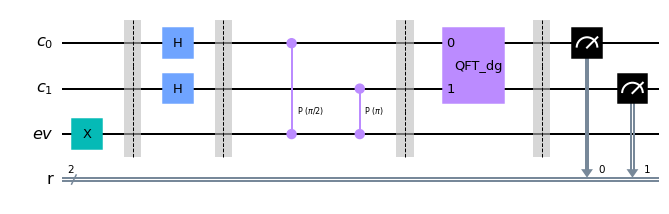

The measurement results are:
{'01': 1000}

Theta was precisely measured to be: 0.5π



The Algorithm steps:



The state after the initialization step


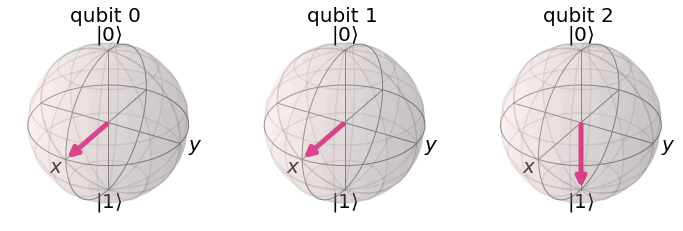

The state after the 1-th CU


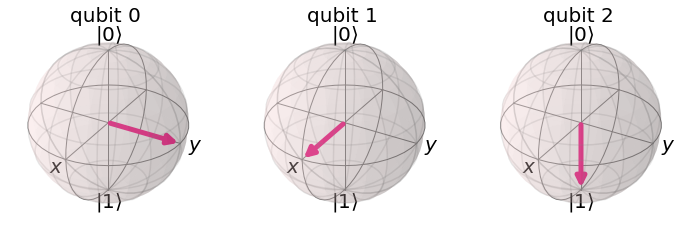

The state after the 2-th CU


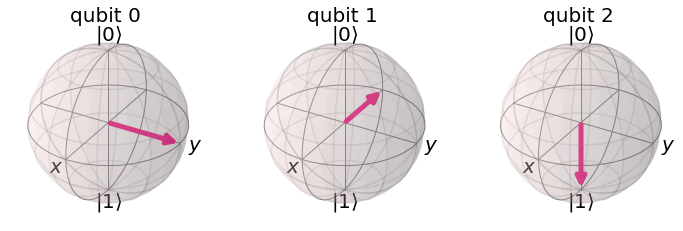

The state after the Inverse Quantum Fourier Transform


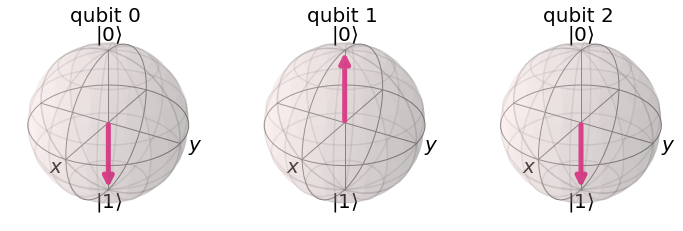

The bases angle is: 0.5π, and the decimal result is: 1
So the result is: 1 * 0.5π = 0.5π


In [22]:
explain_qpe(nb_qubits=3, theta = np.pi / 2)